In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from geopy.distance import geodesic
import glob

## Emissions

In [2]:
df_emissions = pd.read_csv("./Data/emisssions.csv")
df_emissions.head()

,city,date,sector,value,timestamp
0,Canberra,01/01/2019,Aviation,0.026581,1546300800
1,Canberra,02/01/2019,Aviation,0.028275,1546387200
2,Canberra,03/01/2019,Aviation,0.028120,1546473600
3,Canberra,04/01/2019,Aviation,0.028199,1546560000
4,Canberra,05/01/2019,Aviation,0.028428,1546646400


In [3]:
df_NYground_emissions = df_emissions[(df_emissions['city'] == "New York (Greater)") & 
                                     (df_emissions['sector'] == "Ground Transport")].copy()
df_NYground_emissions['date'] = pd.to_datetime(df_NYground_emissions['date'], format='%d/%m/%Y')
df_NYground_emissions['year'] = df_NYground_emissions['date'].dt.year
df_NYground_emissions[df_NYground_emissions['year'] == 2022]

,city,date,sector,value,timestamp,year
342630,New York (Greater),2022-01-01,Ground Transport,32.7337,1640995200,2022
342631,New York (Greater),2022-01-02,Ground Transport,37.4142,1641081600,2022
342632,New York (Greater),2022-01-03,Ground Transport,35.3106,1641168000,2022
342633,New York (Greater),2022-01-04,Ground Transport,36.3643,1641254400,2022
342634,New York (Greater),2022-01-05,Ground Transport,38.2897,1641340800,2022
...,...,...,...,...,...,...
342990,New York (Greater),2022-12-27,Ground Transport,31.3634,1672099200,2022
342991,New York (Greater),2022-12-28,Ground Transport,37.1109,1672185600,2022
342992,New York (Greater),2022-12-29,Ground Transport,37.2068,1672272000,2022
342993,New York (Greater),2022-12-30,Ground Transport,38.0135,1672358400,2022


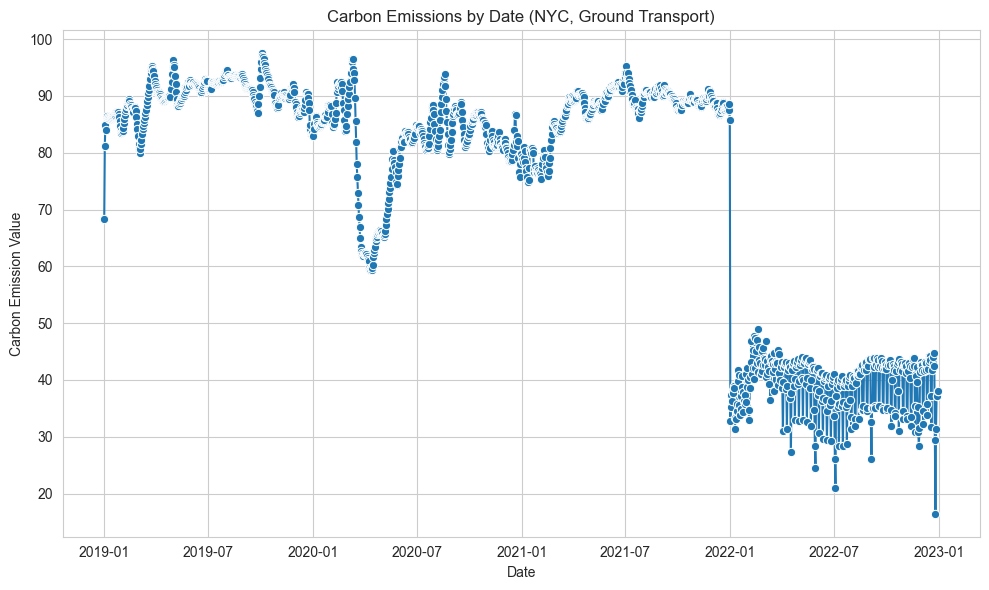

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='date', y='value', data=df_NYground_emissions, marker='o')
plt.title('Carbon Emissions by Date (NYC, Ground Transport)')
plt.xlabel('Date')
plt.ylabel('Carbon Emission Value')
plt.tight_layout()
plt.show()

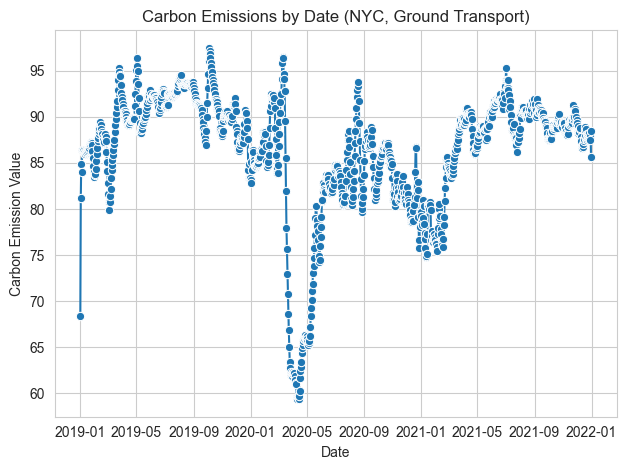

In [5]:
df_NYground_emissions = df_NYground_emissions[df_NYground_emissions['year'] != 2022]
sns.lineplot(x='date', y='value', data=df_NYground_emissions, marker='o')
plt.title('Carbon Emissions by Date (NYC, Ground Transport)')
plt.xlabel('Date')
plt.ylabel('Carbon Emission Value')
plt.tight_layout()
plt.show()

## Bikes

In [6]:
dfs = []

folder_path = './Data/CitiBike 2020/'
all_files = os.listdir(folder_path)
for file in all_files:
    file_path = os.path.join(folder_path, file)
    dfs.append(pd.read_csv(file_path))

folder_path = './Data/CitiBike 2021/'
all_files = os.listdir(folder_path)
for file in all_files:
    file_path = os.path.join(folder_path, file)
    dfs.append(pd.read_csv(file_path))

df_bike = pd.concat(dfs, ignore_index=True)
df_bike['trip minutes'] = df_bike['tripduration'] / 60
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip minutes
0,146,2020-12-01 00:02:50.1450,2020-12-01 00:05:16.1940,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2,2.433333
1,572,2020-12-01 00:11:57.3910,2020-12-01 00:21:30.2510,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2,9.533333
2,387,2020-12-01 00:14:49.3610,2020-12-01 00:21:16.8730,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1,6.450000
3,188,2020-12-01 00:45:06.3680,2020-12-01 00:48:14.4280,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1,3.133333
4,594,2020-12-01 01:17:17.0110,2020-12-01 01:27:11.9400,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,Subscriber,1988,1,9.900000


In [7]:
def calculate_distance(row):
    pt1 = (row['start station latitude'], row['start station longitude'])
    pt2 = (row['end station latitude'], row['end station longitude'])
    return geodesic(pt1, pt2).miles

df_bike['distance'] = df_bike.apply(calculate_distance, axis=1)
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip minutes,distance
0,146,2020-12-01 00:02:50.1450,2020-12-01 00:05:16.1940,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2,2.433333,0.136117
1,572,2020-12-01 00:11:57.3910,2020-12-01 00:21:30.2510,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2,9.533333,1.094164
2,387,2020-12-01 00:14:49.3610,2020-12-01 00:21:16.8730,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1,6.450000,0.634572
3,188,2020-12-01 00:45:06.3680,2020-12-01 00:48:14.4280,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1,3.133333,0.414075
4,594,2020-12-01 01:17:17.0110,2020-12-01 01:27:11.9400,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,Subscriber,1988,1,9.900000,0.732154


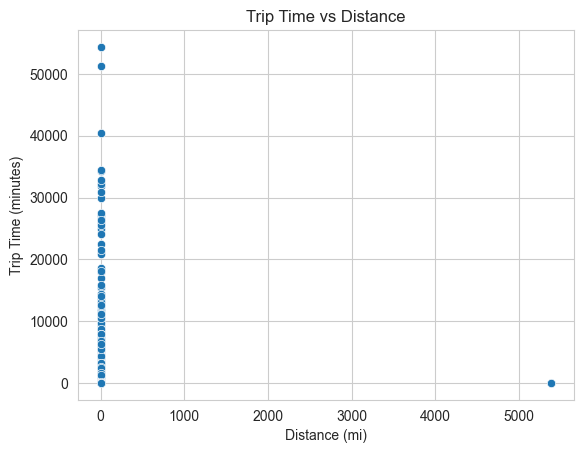

In [8]:
sns.scatterplot(x='distance', y='trip minutes', data=df_bike)
plt.xlabel('Distance (mi)')
plt.ylabel('Trip Time (minutes)')
plt.title('Trip Time vs Distance')
plt.show()

In [9]:
df_bike_clean = df_bike[df_bike['trip minutes'] <= 15]
df_bike_clean[df_bike_clean['distance'] > 200]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip minutes,distance
224941,706,2020-07-17 08:49:47.8100,2020-07-17 09:01:33.8810,3186,Grove St PATH,40.719586,-74.043117,3475,Liberty State Park,0.0,0.0,40831,Subscriber,1991,1,11.766667,5387.688715
229080,546,2020-07-20 08:53:36.6680,2020-07-20 09:02:42.8980,3694,Jackson Square,40.711130,-74.078900,3475,Liberty State Park,0.0,0.0,44683,Subscriber,1997,1,9.100000,5389.431226


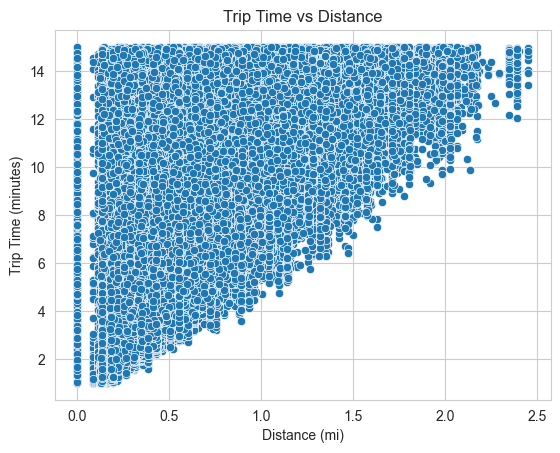

In [10]:
df_bike_clean = df_bike_clean.drop([224941, 229080])
sns.scatterplot(x='distance', y='trip minutes', data=df_bike_clean)
plt.xlabel('Distance (mi)')
plt.ylabel('Trip Time (minutes)')
plt.title('Trip Time vs Distance')
plt.show()

## Uber

In [11]:
# parquet_dir = './Data/Uber/*.parquet'
# parquet_files = glob.glob(parquet_dir)

# for parquet_file in parquet_files:
#     data_frame = pd.read_parquet(parquet_file)
#     csv_file = os.path.splitext(parquet_file)[0] + '.csv'
#     data_frame.to_csv(csv_file, index=False)
#     os.remove(parquet_file)

In [ ]:
# df_uberJan = pd.read_csv('./Data/Uber/fhvhv_tripdata_2021-01.csv')
# df_uberJan['request_datetime'] = pd.to_datetime(df_uberJan['request_datetime'])
# df_uberJan['on_scene_datetime'] = pd.to_datetime(df_uberJan['on_scene_datetime'])
# df_uberJan['pickup_datetime'] = pd.to_datetime(df_uberJan['pickup_datetime'])
# df_uberJan['dropoff_datetime'] = pd.to_datetime(df_uberJan['dropoff_datetime'])
# df_uberJan['trip_minutes'] = (df_uberJan['dropoff_datetime'] - df_uberJan['pickup_datetime']).dt.total_seconds() / 60

In [13]:
dir = './Data/Uber/fhvhv*.csv'
csv_files = glob.glob(dir)

df_uber_clean = []
for file in csv_files:
    df_uber = pd.read_csv(file)
    df_uber['request_datetime'] = pd.to_datetime(df_uber['request_datetime'])
    df_uber['on_scene_datetime'] = pd.to_datetime(df_uber['on_scene_datetime'])
    df_uber['pickup_datetime'] = pd.to_datetime(df_uber['pickup_datetime'])
    df_uber['dropoff_datetime'] = pd.to_datetime(df_uber['dropoff_datetime'])
    df_uber_clean.append(df_uber)

df_uber_clean = pd.concat(df_uber_clean, ignore_index=True)

In [26]:
df_uber_clean['trip_time'] = df_uber_clean['trip_time'] / 60
df_uber_clean['total_minutes'] = ((df_uber_clean['pickup_datetime'] - df_uber_clean['request_datetime']).dt.total_seconds() / 60) + df_uber_clean['trip_time']

In [39]:
df_uber_clean = df_uber_clean[df_uber_clean['total_minutes'] > 0]

Need to clean

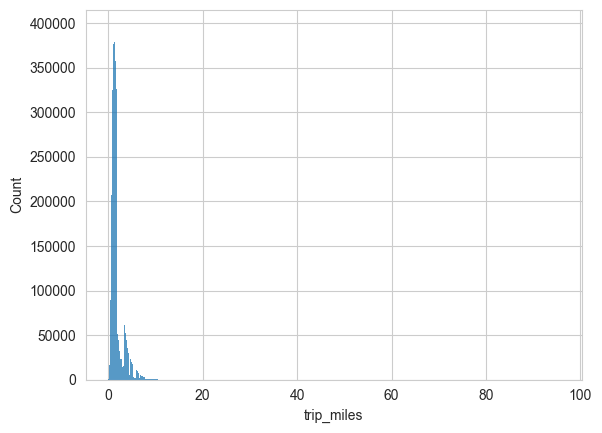

In [40]:
sns.histplot(df_uber_clean['trip_miles'])
plt.show()

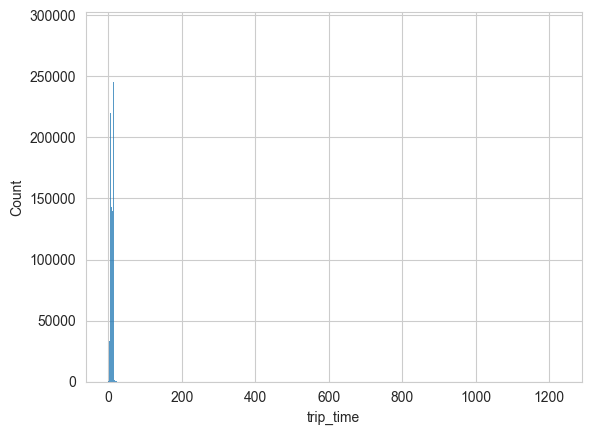

In [42]:
sns.histplot(df_uber_clean['trip_time'])
plt.show()

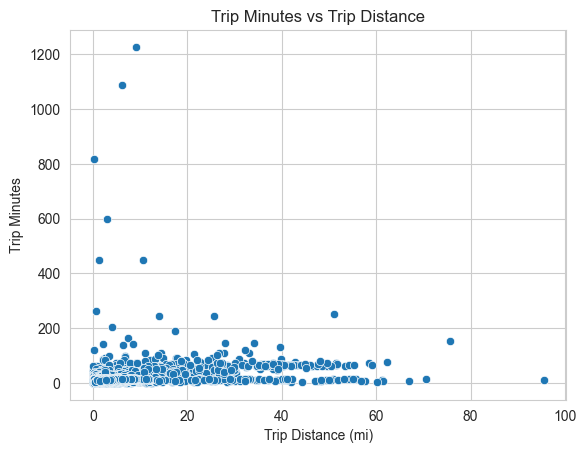

In [43]:
sns.scatterplot(data=df_uber_clean, x='trip_miles', y='trip_time')

plt.title('Trip Minutes vs Trip Distance')
plt.xlabel('Trip Distance (mi)')
plt.ylabel('Trip Minutes')

plt.show()

Ignore for now

In [ ]:
import itertools
import numpy as np
import pandas as pd
import geopandas as gpd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import folium
import plotly.express as px
from datetime import time
from PIL import Image
from time import perf_counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression,Lasso,LassoCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import DBSCAN
from xgboost import XGBRegressor
from folium.plugins import HeatMap, HeatMapWithTime

## migic functions
%matplotlib inline

# auxiliary functions
## data processing methods
def check_missing_val(data):
    print("Checking attributes that have missing values...")
    for col in data.columns:
        if data[col].isnull().sum() !=0:
            print("{} : {}".format(col,data[col].isnull().sum()))

def check_uniqueness(data):
    print("Checking uniqueness of each attributes ...")
    for col in data.columns:
        print("{} : {} -> {}".format(col,data[col].is_unique,len(data[col].unique())))
        
def get_quantile(data,col_name,q_val,inter):
    return np.percentile(data[col_name],q_val,method=inter)

def iqr_test(data,col_name,inter):
    qu = get_quantile(data,'quantity',75,inter)
    ql = get_quantile(data,'quantity',25,inter)
    diff = qu - ql
    U = qu + 1.5 * diff
    L = ql - 1.5 * diff
    return U,L

def remove_outliers(data,col_name,inter):
    """filter the outliers of the numerical data

    Args:
        data (_type_): _description_
        col_name (_type_): _description_
        inter (_type_): _description_

    Returns:
        _type_: _description_
    """
    U,L = iqr_test(data,col_name,inter)
    return data[data[col_name]>= L | data[col_name]<=U]
    
        
def get_kmeans_categories(centroid,centers):
    """Returns the correct class when centroid is given

    Args:
        centroid (float): centroid assigned to given order
        centers (float): all centroids given by KNN

    Returns:
        str: specified distance range
    """
    if centroid == centers[0]:
        return 'short_range'
    elif centroid == centers[1]:
        return 'mid_range'
    else:
        return 'long_range'
    
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix. 
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
fhvhv_tripdata_2021_01 = pq.read_table('./Data/Uber/fhvhv_tripdata_2021-01.parquet')
fhvhv_tripdata_2021_01 = fhvhv_tripdata_2021_01.to_pandas()
fhvhv_tripdata_2021_01.head()

FileNotFoundError: ./Data/Uber/fhvhv_tripdata_2021-01.parquet

In [ ]:
fhvhv_tripdata_2021_01['shared_request_flag'] = fhvhv_tripdata_2021_01['shared_request_flag'].apply(lambda x: 1 if x == 'Y' else 0)
fhvhv_tripdata_2021_01['shared_match_flag'] = fhvhv_tripdata_2021_01['shared_match_flag'].apply(lambda x: 1 if x == 'Y' else 0)
fhvhv_tripdata_2021_01['access_a_ride_flag'] = fhvhv_tripdata_2021_01['access_a_ride_flag'].apply(lambda x: 1 if x == 'Y' else 0)
fhvhv_tripdata_2021_01['wav_request_flag'] = fhvhv_tripdata_2021_01['wav_request_flag'].apply(lambda x: 1 if x == 'Y' else 0)
fhvhv_tripdata_2021_01['wav_match_flag'] = fhvhv_tripdata_2021_01['wav_match_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
fhvhv_tripdata_2021_01.loc[fhvhv_tripdata_2021_01.PULocationID.isin(airport_ids) & fhvhv_tripdata_2021_01.DOLocationID.isin(airport_ids),'airport_fee'] = 6852*[5]
fhvhv_tripdata_2021_01.loc[fhvhv_tripdata_2021_01.PULocationID.isin(airport_ids) & ~fhvhv_tripdata_2021_01.DOLocationID.isin(airport_ids),'airport_fee'] = 168695*[2.5]
fhvhv_tripdata_2021_01.loc[~fhvhv_tripdata_2021_01.PULocationID.isin(airport_ids) & fhvhv_tripdata_2021_01.DOLocationID.isin(airport_ids),'airport_fee'] = 190456*[2.5]

NameError: name 'airport_ids' is not defined